In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv("../input/hr-analytics/HR_comma_sep.csv")

In [15]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [17]:
df = df.rename(columns={'satisfaction_level':'satisfaction',
                       'last_evaluation':'evaluation',
                       'number_project':'projectCount',
                       'average_montly_hours':'averageMonthlyHours',
                       'time_spend_company':'yearsAtCompany',
                       'Work_accident':'workAccident',
                       'promotion_last_5years':'promotion'})

In [18]:
df.describe()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [19]:
df

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [20]:
df.isnull().sum()

satisfaction           0
evaluation             0
projectCount           0
averageMonthlyHours    0
yearsAtCompany         0
workAccident           0
left                   0
promotion              0
Department             0
salary                 0
dtype: int64

In [21]:
department = df.groupby('Department')['Department'].agg('count').sort_values(ascending=False)
department

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [22]:
salary = df.groupby('salary')['salary'].agg('count').sort_values(ascending=False)
salary

salary
low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [23]:
left = df.groupby('left')['left'].agg('count').sort_values(ascending=False)
left

left
0    11428
1     3571
Name: left, dtype: int64

In [24]:
emp_left = df.groupby('left')
emp_left.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction'>

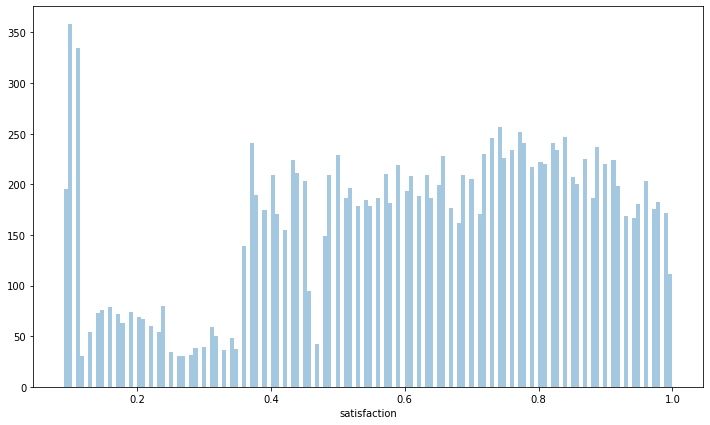

In [25]:
plt.figure(figsize=(12,7))
sns.distplot(df['satisfaction'], kde=False, bins=150)

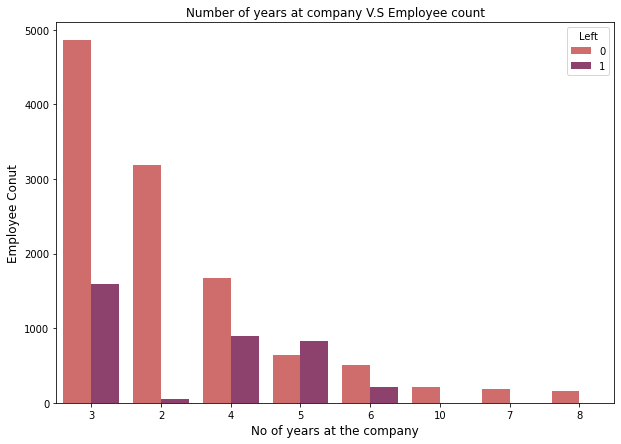

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(x='yearsAtCompany',
              hue='left',
              data=df,order = df['yearsAtCompany'].value_counts().index,
              palette='flare'
             ).set_title('Number of years at company V.S Employee count')
plt.xlabel('No of years at the company', size=12)
plt.ylabel('Employee Conut', size = 12)
plt.legend(loc='upper right', title='Left')
plt.show()

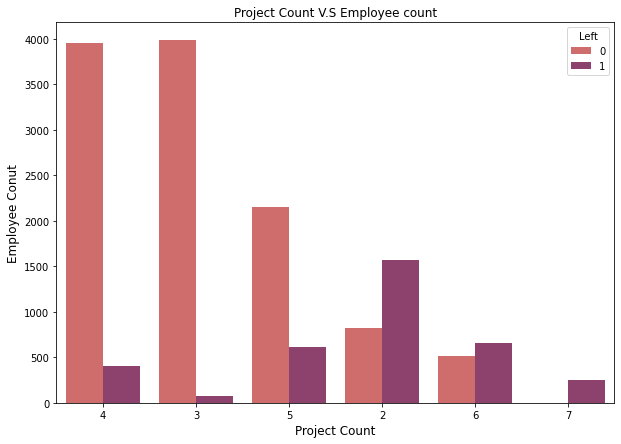

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(x='projectCount',
              hue='left',
              data=df,
              order = df['projectCount'].value_counts().index,
              palette='flare'
             ).set_title('Project Count V.S Employee count')
plt.xlabel('Project Count', size=12)
plt.ylabel('Employee Conut', size = 12)
plt.legend(loc='upper right', title='Left')
plt.show()

Text(0, 0.5, 'Employee Count')

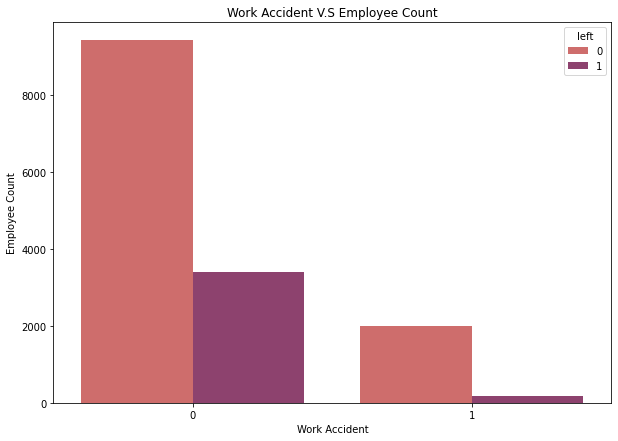

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(x='workAccident',
              hue='left',
              data=df,
             palette='flare',
             order=df['workAccident'].value_counts().index).set_title('Work Accident V.S Employee Count')
plt.xlabel('Work Accident')
plt.ylabel('Employee Count')


Text(0, 0.5, 'Employee Count')

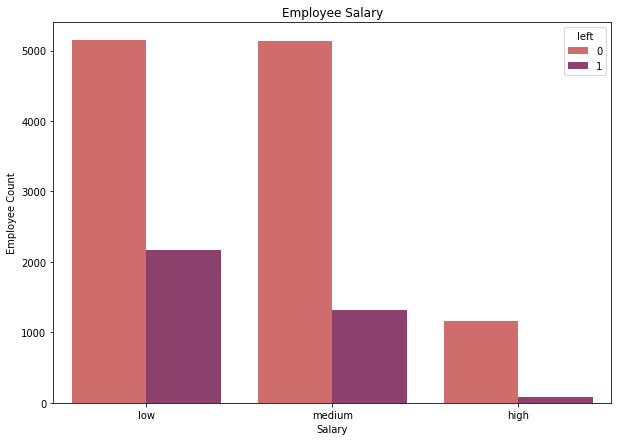

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(x='salary',
              hue='left',
             data=df,
             palette='flare',
             order=df['salary'].value_counts().index).set_title('Employee Salary')
plt.xlabel('Salary')
plt.ylabel('Employee Count')

Text(0, 0.5, 'Employee Count')

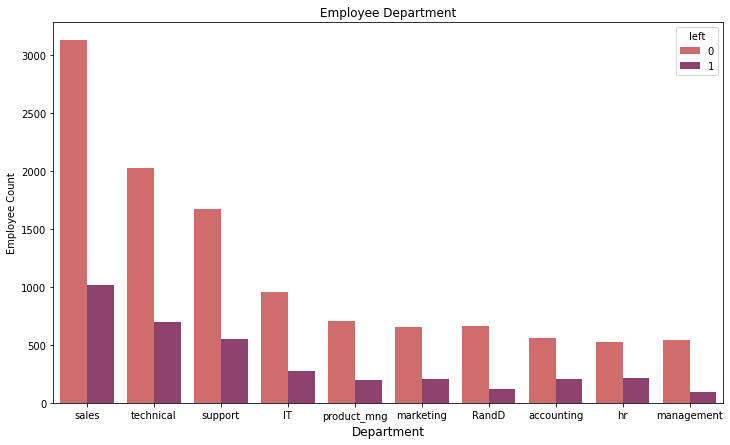

In [30]:
plt.figure(figsize=(12,7))
sns.countplot(x='Department',
              hue='left',
             data=df,
             palette='flare',
             order=df['Department'].value_counts().index).set_title('Employee Department')
plt.xlabel('Department', size=12)
plt.ylabel('Employee Count')

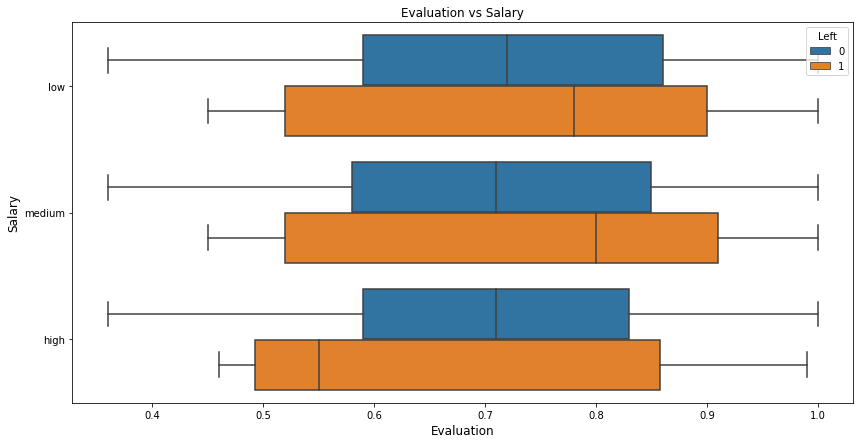

In [31]:
plt.figure(figsize=(14,7))
sns.boxplot(x='evaluation',y='salary',data=df,hue='left')
plt.xlabel('Evaluation', size=12)
plt.ylabel('Salary', size=12)
plt.title('Evaluation vs Salary')
plt.legend(title='Left', loc='upper right')
plt.show()

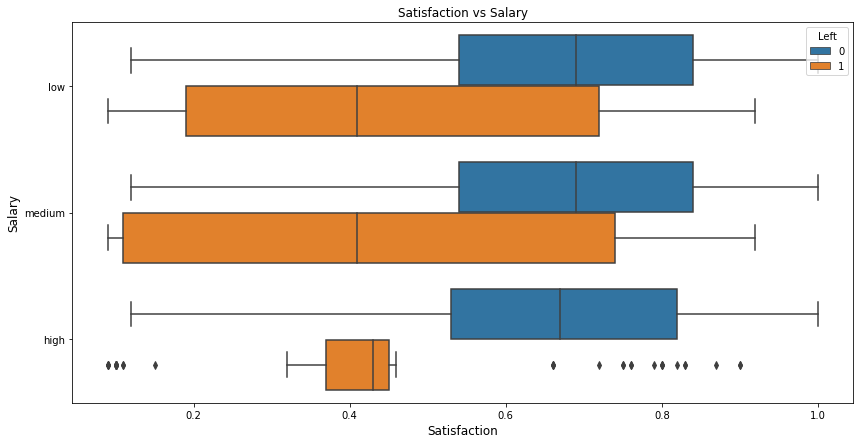

In [32]:
plt.figure(figsize=(14,7))
sns.boxplot(x='satisfaction',y='salary',data=df,hue='left')
plt.xlabel('Satisfaction', size=12)
plt.ylabel('Salary', size=12)
plt.title('Satisfaction vs Salary')
plt.legend(title='Left', loc='upper right')
plt.show()

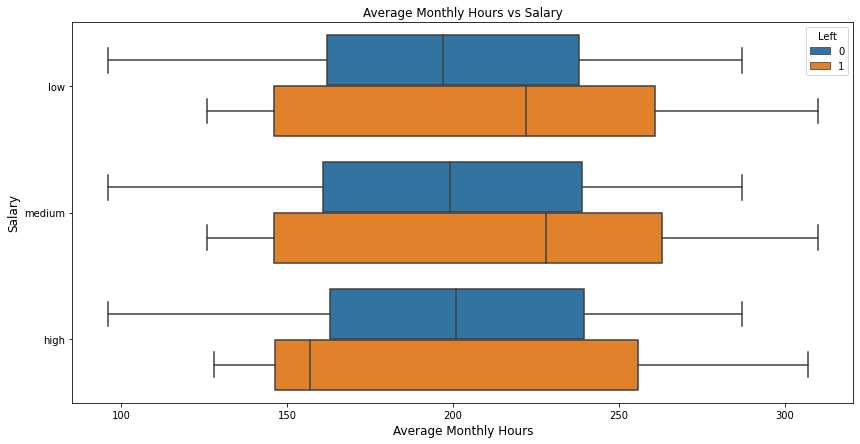

In [33]:
plt.figure(figsize=(14,7))
sns.boxplot(x='averageMonthlyHours',y='salary',data=df,hue='left')
plt.xlabel('Average Monthly Hours', size=12)
plt.ylabel('Salary', size=12)
plt.title('Average Monthly Hours vs Salary')
plt.legend(title='Left', loc='upper right')
plt.show()

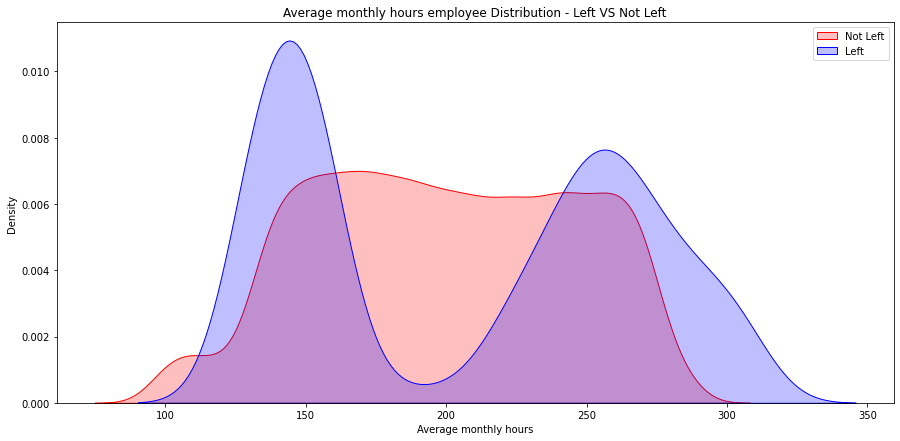

In [34]:
plt.figure(figsize=(15,7))
sns.kdeplot(df.loc[df.left == 0,'averageMonthlyHours'], label='Not Left', shade=True, color='red')
sns.kdeplot(df.loc[df.left == 1,'averageMonthlyHours'], label='Left', shade=True, color='blue')
plt.title('Average monthly hours employee Distribution - Left VS Not Left')
plt.xlabel('Average monthly hours')
plt.legend()

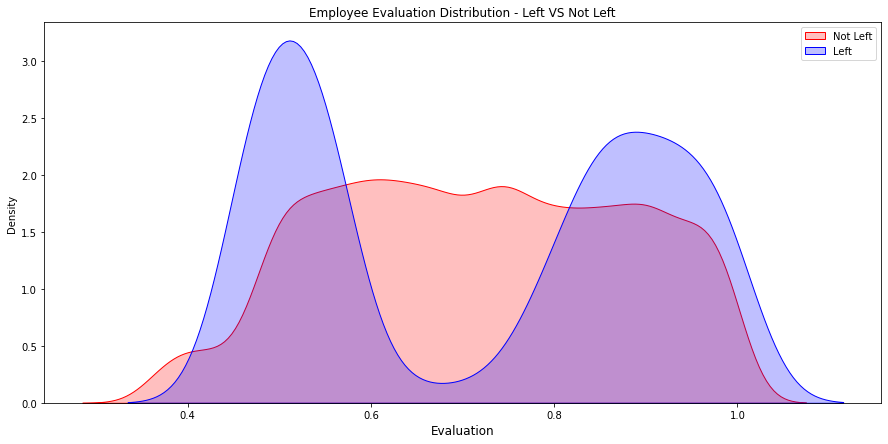

In [35]:
plt.figure(figsize=(15,7))
sns.kdeplot(df.loc[df.left == 0,'evaluation'], label='Not Left', shade=True, color='red')
sns.kdeplot(df.loc[df.left == 1,'evaluation'], label='Left', shade=True, color='blue')
plt.title('Employee Evaluation Distribution - Left VS Not Left')
plt.xlabel('Evaluation', size=12)
plt.legend()

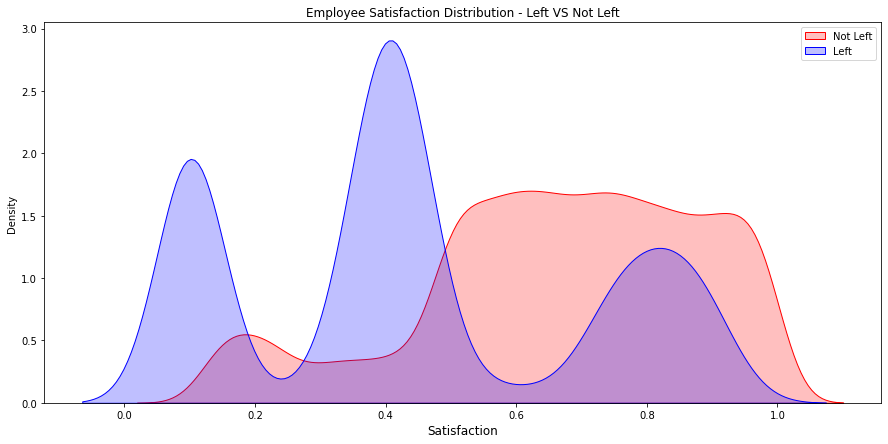

In [36]:
plt.figure(figsize=(15,7))
sns.kdeplot(df.loc[df.left == 0,'satisfaction'], label='Not Left', shade=True, color='red')
sns.kdeplot(df.loc[df.left == 1,'satisfaction'], label='Left', shade=True, color='blue')
plt.title('Employee Satisfaction Distribution - Left VS Not Left')
plt.xlabel('Satisfaction', size = 12)
plt.legend()

In [37]:
left = df.loc[df.left == 1]
notleft = df.loc[df.left==0]
left.drop('left',axis=1,inplace=True)
notleft.drop('left',axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


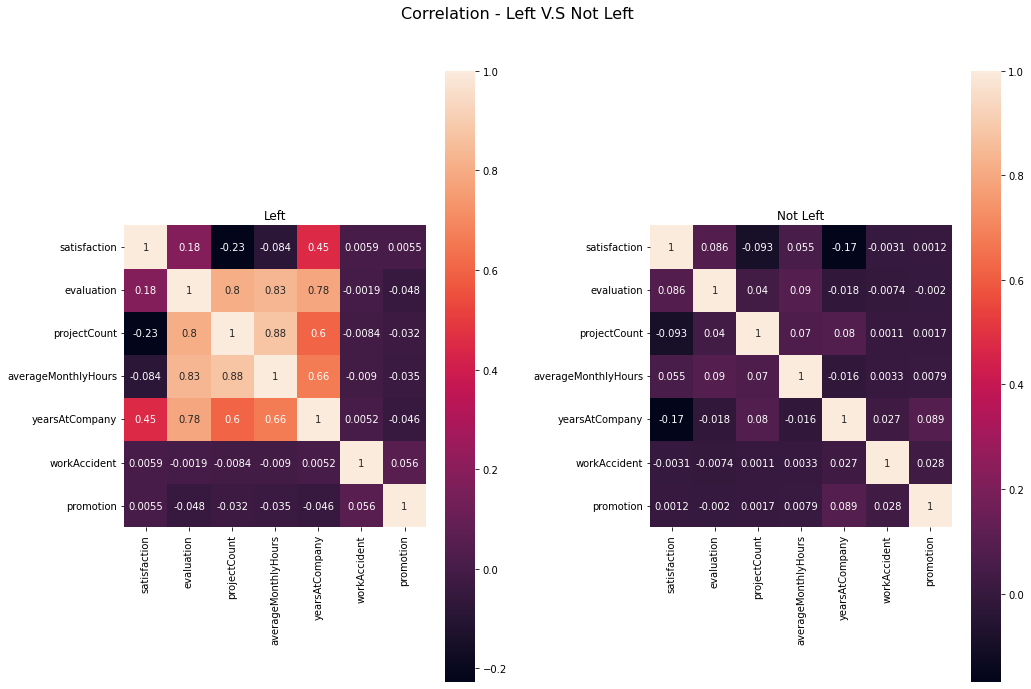

In [38]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
ax[0].set_title('Left')
sns.heatmap(left.corr(), ax=ax[0], square=True, annot=True)
ax[1].set_title('Not Left')
sns.heatmap(notleft.corr(), ax=ax[1], square=True, annot=True)
fig.suptitle('Correlation - Left V.S Not Left', size= 16)
plt.tight_layout(pad=3.0)